In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

%matplotlib inline

In [2]:
burglaries = gpd.read_file('../data/burg_agg.geojson')

In [3]:
burglaries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   TRACTCE                      806 non-null    object  
 1   count_of_burglaries          806 non-null    int64   
 2   STATEFP                      806 non-null    object  
 3   COUNTYFP                     806 non-null    object  
 4   GEOID                        806 non-null    object  
 5   NAME                         806 non-null    object  
 6   NAMELSAD                     806 non-null    object  
 7   MTFCC                        806 non-null    object  
 8   FUNCSTAT                     806 non-null    object  
 9   ALAND                        806 non-null    int64   
 10  AWATER                       806 non-null    int64   
 11  INTPTLAT                     806 non-null    object  
 12  INTPTLON                     806 non-null    object  
 1

In [4]:
burglaries = burglaries.drop_duplicates(subset = 'TRACTCE').astype({'median_income': 'int64'})

In [5]:
burglaries['burglaries_per_1000'].max()

19.53125

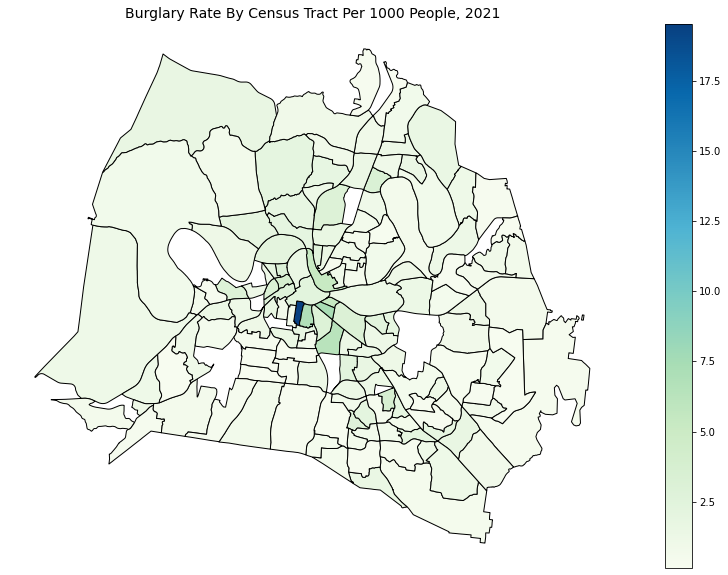

In [6]:
fig, ax = plt.subplots(figsize=(17,10))
burglaries.plot(column = 'burglaries_per_1000',
               cmap = 'GnBu', 
               edgecolor = 'black',
               legend = True, 
               ax = ax)
ax.axis('off')
plt.title('Burglary Rate By Census Tract Per 1000 People, 2021', fontsize = 14);


In [7]:
zoom = burglaries[burglaries['burglaries_per_1000'] > 5]

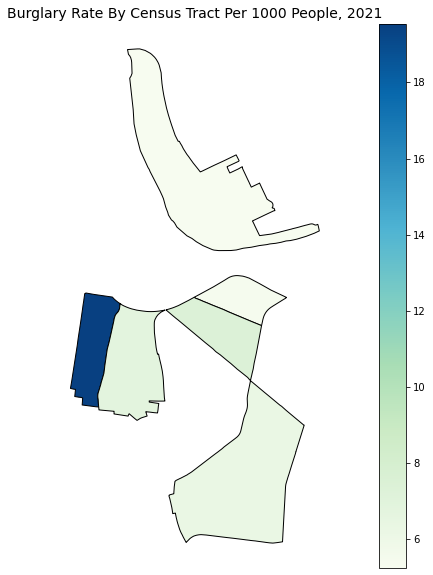

In [8]:
fig, ax = plt.subplots(figsize=(17,10))
zoom.plot(column = 'burglaries_per_1000',
               cmap = 'GnBu', 
               edgecolor = 'black',
               legend = True, 
               ax = ax)
ax.axis('off')
plt.title('Burglary Rate By Census Tract Per 1000 People, 2021', fontsize = 14);

In [9]:
max_burglaries = zoom[zoom['burglaries_per_1000'] == zoom['burglaries_per_1000'].max()]

In [10]:
center = max_burglaries.geometry.centroid
area_center = [center.y, center.x]
#area_center = [max_burglaries['latitude'], max_burglaries['longitude']]

C:\Users\sarei\AppData\Local\Temp/ipykernel_8740/2837820436.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = max_burglaries.geometry.centroid


In [11]:
map_tract_16300 = folium.Map(location =  area_center, zoom_start = 12)
folium.GeoJson(max_burglaries).add_to(map_tract_16300)

map_tract_16300

In [12]:
police = gpd.read_file('../data/police_precints.geojson')

In [20]:
map_tract_16300 = folium.Map(location =  area_center, zoom_start = 12)
folium.GeoJson(zoom).add_to(map_tract_16300)

for row_index, row_values in police.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['precinct_name'])
    icon = folium.Icon(color="blue",icon = "fas fa-building", prefix = 'fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 
    
    marker.add_to(map_tract_16300)

map_tract_16300



In [ ]:
police

In [18]:
map_total = folium.Map(location =  area_center, zoom_start = 10)

folium.Choropleth(
 geo_data = burglaries,
 name = 'Choropleth',
 data = burglaries,
 columns = ['TRACTCE','burglaries_per_1000'],
 key_on = 'feature.properties.TRACTCE',
 fill_color = 'YlOrRd',
 bins = [0, 5, 8, 10, 12, 15, 17, 21],
 fill_opacity = 0.6,
 line_opacity = 1,
 legend_name = 'Burglaries Per 1000 Residents',
 smooth_factor = 0
).add_to(map_total)

# for row_index, row_values in police.iterrows():
#     loc = [row_values['latitude'], row_values['longitude']]
#     pop = str(row_values['precinct_name'])
#     icon = folium.Icon(color="blue",icon = "fas fa-building", prefix = 'fa')
    
#     marker = folium.Marker(
#         location = loc, 
#         popup = pop, icon = icon) 
    
#     marker.add_to(map_total)
    
map_total.save('../maps/map_total.html')

map_total

In [16]:
burglaries_income = burglaries[burglaries['median_income'] > 0]

In [17]:
map_income = folium.Map(location =  area_center, zoom_start = 10)

folium.Choropleth(
 geo_data = burglaries_income,
 name = 'Choropleth',
 data = burglaries_income,
 columns = ['TRACTCE','median_income'],
 key_on = 'feature.properties.TRACTCE',
 fill_color = 'YlGnBu',
 #bins = [0, 5, 8, 10, 12, 15, 17, 21],
 fill_opacity = 0.5,
 line_opacity = 1,
 legend_name = 'Median Income by Census Tract',
 smooth_factor = 0
).add_to(map_income)

map_income